<h1 style="font-size:30px;">Assignment: MLP on Fashion MNIST Dataset using Keras </h1>

You have already seen how to implement MLPs (Multi-Layer Perceptron) using the Keras framework. So, in this assignment, let’s go ahead and implement a simple MLP (Multi Layer Perceptron). 


We will be using the **Fashion MNIST Dataset**, which is a very popular and simple dataset to carry out classification tasks. We will be performing a multi-class claasification task using this dataset.

<img src="https://learnopencv.com/wp-content/uploads/2022/02/c4_02_fashion_mnist.jpg" width=700 align='center'><br/>

There are 10 classes. Each training and test example is a `28x28` image and is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |



### Maximum Points: 30

| Section | Problem | Points |
|:------:|:--------|:------:|
|   1    | Validation Accuracy between 85% to 89% / > 89% | 10 / 20 | 
|   2    | Model Predictions on sample input      | 10 | 



## Problem Description

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">1. Implement the MLP Model</font>

Here, the task is to classify objects in a dataset, so you need to implement a simple MLP model with 10 output classes. Ensure it’s a very simple model that contains only a few `Dense` layers, with a minimal number of nodes/units.

**Note: Remember to use `softmax` activation for the last Dense layer.**



### <font style="color:rgb(50,120,230)">2. Getting the Desired accuracy on Test Data</font>

Once you have defined the model, you can train it. To get better accuracy, experiment with the learning rate and the number of epochs. You might also need to tweak the model architecture a bit as well.

The advantage of opting for a very simple dataset is that your model can perform very well even with very few `Dense` layers.

Here are some hints to improve the accuracy:
- Train for a longer duration
- Try with different learning rates (try reducing the learning rate as well)

You need to achieve **at least 85% test accuracy** on the test data to score **10 points**. If you achieve **more than 89% test accuracy**, you will receive the full **20 points**.


### <font style="color:rgb(50,120,230)">3. Model Prediction</font>

Once you complete the training and get the desired accuracy, you need to implement a simple prediction function. This is where your trained model should output the class label, given a sample input. 

Another **10 points** have been assigned for this section.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import ssl
from dataclasses import dataclass

import numpy as np
import os

import matplotlib.pyplot as plt

In [26]:
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras import regularizers

In [3]:
ssl._create_default_https_context = ssl._create_unverified_context

**Load the Fashion MNIST dataset from `tensorflow.keras.datasets`**

The training set contains `60000` samples while that of the test set containing `10000` samples.

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train, X_test = X_train.astype('float32') / 255., X_test.astype('float32')/255.

## 1 Model Training [20 Points]

All training parameters are defined here. So, this is where you can improve your accuracy and also the architecture.

Here are a few hints on to improve the accuracy:
- Train for a longer duration
- Try with different learning rates
- Try increasing the number of nodes/units in the Dense layers

You need to achieve **at least 85% accuracy** on the **test data** in order to score **10 points**. If you achieve **more than 89% test accuracy**, you end up with a full **20 points**.

In [6]:
is_training = True

In [120]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 2048  
    epochs_count: int = 5000
    learning_rate: float = 0.0001 
    
    # update changed parameters in the below coding block.
    
    ###
    batch_size: int = 2048  
    epochs_count: int = 5000
    learning_rate: float = 0.0001 
    ###


### 1.1 Model Definition

You need to define your model here. Recall that each image in the dataset has a size of `28 x 28`, so your `input_shape` should have a size of: `(28,28)`. Also, don’t forget, you need to implement a very simple MLP here, with only a few `Dense` layers. Have a look at this block diagram representing a simple MLP. 

<img src = "https://learnopencv.com/wp-content/uploads/2022/02/c4_02_mlps_fashion_mnist.png" width=950 align='center'><br/>

The time required to train your model on the course site should be roughly **2-3 minutes**.


**Note: Remember to use a `softmax` activation for the output layer.**

In [121]:
def get_model():
    '''
    You need to define your MLP model here.
    '''
    
    model = None
    
    ###
    model = tf.keras.Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(128, input_shape=(784,),kernel_regularizer=regularizers.l2(0.01), activation="relu"))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(Dense(10, input_shape=(16384,), activation="softmax"))
    ###
    
    return model

### 1.2 Display the model

In [122]:
tf.random.set_seed(42)

model_fmnist = get_model()

print(model_fmnist.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 128)               100480    
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


### 1.3 Create directory to save final model

In [123]:
if not os.path.exists('models'):
    os.makedirs('models')

### 1.4 Main

Let’s use the configuration parameters defined above and start training.

In [124]:
def compile_and_train_model(train_set, test_set, model, training_configuration):
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=training_configuration.learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'],
                 )
   
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("./models/fashion_mnist_final.h5", monitor= "val_accuracy",
                                                   save_best_only=True, mode= "max")
    
    history = model.fit(train_set[0],train_set[1],
                        batch_size = training_configuration.batch_size,
                        epochs=training_configuration.epochs_count,
                        validation_data=test_set,
                        callbacks=[checkpoint_callback,]
                       )
    
    return model, history

In [30]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [31]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### 1.5 Start training

In [125]:
training_configuration = TrainingConfiguration()

train_set = (X_train, y_train)
test_set = (X_test, y_test)

if is_training:
    model_final, training_results = compile_and_train_model(train_set, test_set, model_fmnist, training_configuration)

Epoch 1/5000
30/30 [==============================] - 1s 16ms/step - loss: 4.2069 - accuracy: 0.2676 - val_loss: 3.7619 - val_accuracy: 0.5445
Epoch 2/5000
30/30 [==============================] - 0s 11ms/step - loss: 3.6110 - accuracy: 0.4967 - val_loss: 3.2936 - val_accuracy: 0.6516
Epoch 3/5000
30/30 [==============================] - 0s 11ms/step - loss: 3.2392 - accuracy: 0.5845 - val_loss: 2.9924 - val_accuracy: 0.6749
Epoch 4/5000
30/30 [==============================] - 0s 11ms/step - loss: 2.9832 - accuracy: 0.6295 - val_loss: 2.7758 - val_accuracy: 0.7013
Epoch 5/5000
30/30 [==============================] - 0s 11ms/step - loss: 2.7890 - accuracy: 0.6583 - val_loss: 2.6009 - val_accuracy: 0.7185
Epoch 6/5000
30/30 [==============================] - 0s 11ms/step - loss: 2.6204 - accuracy: 0.6818 - val_loss: 2.4499 - val_accuracy: 0.7309
Epoch 7/5000
30/30 [==============================] - 0s 11ms/step - loss: 2.4744 - accuracy: 0.6981 - val_loss: 2.3158 - val_accuracy: 0.7443

30/30 [==============================] - 0s 8ms/step - loss: 0.6658 - accuracy: 0.8284 - val_loss: 0.6427 - val_accuracy: 0.8306
Epoch 59/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.6595 - accuracy: 0.8280 - val_loss: 0.6393 - val_accuracy: 0.8312
Epoch 60/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.6565 - accuracy: 0.8282 - val_loss: 0.6345 - val_accuracy: 0.8333
Epoch 61/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.6507 - accuracy: 0.8285 - val_loss: 0.6321 - val_accuracy: 0.8327
Epoch 62/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.6470 - accuracy: 0.8298 - val_loss: 0.6279 - val_accuracy: 0.8332
Epoch 63/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.6427 - accuracy: 0.8298 - val_loss: 0.6239 - val_accuracy: 0.8338
Epoch 64/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.6406 - accuracy: 0.8301 - val_loss: 0.6224 - val_accuracy: 0.8334
Epoch 65/50

30/30 [==============================] - 0s 8ms/step - loss: 0.5557 - accuracy: 0.8424 - val_loss: 0.5486 - val_accuracy: 0.8402
Epoch 116/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.5554 - accuracy: 0.8424 - val_loss: 0.5466 - val_accuracy: 0.8392
Epoch 117/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.5534 - accuracy: 0.8426 - val_loss: 0.5452 - val_accuracy: 0.8409
Epoch 118/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.5536 - accuracy: 0.8430 - val_loss: 0.5460 - val_accuracy: 0.8402
Epoch 119/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.5521 - accuracy: 0.8431 - val_loss: 0.5437 - val_accuracy: 0.8403
Epoch 120/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.5504 - accuracy: 0.8444 - val_loss: 0.5438 - val_accuracy: 0.8410
Epoch 121/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.5509 - accuracy: 0.8430 - val_loss: 0.5444 - val_accuracy: 0.8394
Epoch 1

Epoch 172/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.5136 - accuracy: 0.8522 - val_loss: 0.5117 - val_accuracy: 0.8455
Epoch 173/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.5137 - accuracy: 0.8510 - val_loss: 0.5113 - val_accuracy: 0.8470
Epoch 174/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.5127 - accuracy: 0.8513 - val_loss: 0.5116 - val_accuracy: 0.8455
Epoch 175/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.5122 - accuracy: 0.8519 - val_loss: 0.5104 - val_accuracy: 0.8456
Epoch 176/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.5117 - accuracy: 0.8513 - val_loss: 0.5101 - val_accuracy: 0.8459
Epoch 177/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.5111 - accuracy: 0.8522 - val_loss: 0.5091 - val_accuracy: 0.8458
Epoch 178/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.5101 - accuracy: 0.8519 - val_loss: 0.5102 - val_accuracy:

Epoch 229/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4838 - accuracy: 0.8579 - val_loss: 0.4862 - val_accuracy: 0.8508
Epoch 230/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4847 - accuracy: 0.8584 - val_loss: 0.4869 - val_accuracy: 0.8510
Epoch 231/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.4849 - accuracy: 0.8570 - val_loss: 0.4858 - val_accuracy: 0.8513
Epoch 232/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.4842 - accuracy: 0.8567 - val_loss: 0.4851 - val_accuracy: 0.8521
Epoch 233/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4839 - accuracy: 0.8589 - val_loss: 0.4848 - val_accuracy: 0.8507
Epoch 234/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4813 - accuracy: 0.8584 - val_loss: 0.4849 - val_accuracy: 0.8511
Epoch 235/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4822 - accuracy: 0.8579 - val_loss: 0.4860 - val_accurac

Epoch 286/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4634 - accuracy: 0.8627 - val_loss: 0.4677 - val_accuracy: 0.8555
Epoch 287/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4634 - accuracy: 0.8623 - val_loss: 0.4675 - val_accuracy: 0.8552
Epoch 288/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4627 - accuracy: 0.8640 - val_loss: 0.4677 - val_accuracy: 0.8547
Epoch 289/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4625 - accuracy: 0.8626 - val_loss: 0.4682 - val_accuracy: 0.8543
Epoch 290/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4611 - accuracy: 0.8637 - val_loss: 0.4663 - val_accuracy: 0.8549
Epoch 291/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4618 - accuracy: 0.8625 - val_loss: 0.4670 - val_accuracy: 0.8551
Epoch 292/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4614 - accuracy: 0.8626 - val_loss: 0.4657 - val_accuracy:

Epoch 343/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4451 - accuracy: 0.8675 - val_loss: 0.4534 - val_accuracy: 0.8574
Epoch 344/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4457 - accuracy: 0.8679 - val_loss: 0.4535 - val_accuracy: 0.8589
Epoch 345/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4446 - accuracy: 0.8676 - val_loss: 0.4536 - val_accuracy: 0.8579
Epoch 346/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4451 - accuracy: 0.8672 - val_loss: 0.4564 - val_accuracy: 0.8576
Epoch 347/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4466 - accuracy: 0.8670 - val_loss: 0.4518 - val_accuracy: 0.8573
Epoch 348/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4432 - accuracy: 0.8683 - val_loss: 0.4526 - val_accuracy: 0.8577
Epoch 349/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4439 - accuracy: 0.8691 - val_loss: 0.4524 - val_accuracy:

Epoch 400/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4314 - accuracy: 0.8699 - val_loss: 0.4416 - val_accuracy: 0.8606
Epoch 401/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4319 - accuracy: 0.8710 - val_loss: 0.4413 - val_accuracy: 0.8605
Epoch 402/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4311 - accuracy: 0.8710 - val_loss: 0.4421 - val_accuracy: 0.8604
Epoch 403/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4300 - accuracy: 0.8708 - val_loss: 0.4408 - val_accuracy: 0.8615
Epoch 404/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4308 - accuracy: 0.8712 - val_loss: 0.4413 - val_accuracy: 0.8606
Epoch 405/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4300 - accuracy: 0.8710 - val_loss: 0.4402 - val_accuracy: 0.8613
Epoch 406/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.4299 - accuracy: 0.8706 - val_loss: 0.4397 - val_accuracy

Epoch 457/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4188 - accuracy: 0.8750 - val_loss: 0.4314 - val_accuracy: 0.8638
Epoch 458/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4191 - accuracy: 0.8746 - val_loss: 0.4315 - val_accuracy: 0.8650
Epoch 459/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.4174 - accuracy: 0.8737 - val_loss: 0.4315 - val_accuracy: 0.8662
Epoch 460/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4169 - accuracy: 0.8749 - val_loss: 0.4318 - val_accuracy: 0.8650
Epoch 461/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4196 - accuracy: 0.8751 - val_loss: 0.4307 - val_accuracy: 0.8645
Epoch 462/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4182 - accuracy: 0.8750 - val_loss: 0.4311 - val_accuracy: 0.8652
Epoch 463/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4187 - accuracy: 0.8741 - val_loss: 0.4319 - val_accuracy

Epoch 514/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4087 - accuracy: 0.8772 - val_loss: 0.4219 - val_accuracy: 0.8683
Epoch 515/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.4092 - accuracy: 0.8780 - val_loss: 0.4230 - val_accuracy: 0.8685
Epoch 516/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.4084 - accuracy: 0.8776 - val_loss: 0.4223 - val_accuracy: 0.8689
Epoch 517/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.4098 - accuracy: 0.8769 - val_loss: 0.4237 - val_accuracy: 0.8666
Epoch 518/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4079 - accuracy: 0.8777 - val_loss: 0.4222 - val_accuracy: 0.8680
Epoch 519/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4082 - accuracy: 0.8778 - val_loss: 0.4234 - val_accuracy: 0.8676
Epoch 520/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.4087 - accuracy: 0.8771 - val_loss: 0.4221 - val_accurac

Epoch 571/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3977 - accuracy: 0.8802 - val_loss: 0.4152 - val_accuracy: 0.8700
Epoch 572/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3990 - accuracy: 0.8803 - val_loss: 0.4167 - val_accuracy: 0.8674
Epoch 573/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.4006 - accuracy: 0.8793 - val_loss: 0.4160 - val_accuracy: 0.8691
Epoch 574/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3989 - accuracy: 0.8799 - val_loss: 0.4163 - val_accuracy: 0.8699
Epoch 575/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3983 - accuracy: 0.8801 - val_loss: 0.4167 - val_accuracy: 0.8700
Epoch 576/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3983 - accuracy: 0.8807 - val_loss: 0.4148 - val_accuracy: 0.8705
Epoch 577/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3995 - accuracy: 0.8799 - val_loss: 0.4166 - val_accuracy:

Epoch 628/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3921 - accuracy: 0.8822 - val_loss: 0.4100 - val_accuracy: 0.8712
Epoch 629/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3918 - accuracy: 0.8828 - val_loss: 0.4095 - val_accuracy: 0.8720
Epoch 630/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3919 - accuracy: 0.8824 - val_loss: 0.4098 - val_accuracy: 0.8722
Epoch 631/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3916 - accuracy: 0.8827 - val_loss: 0.4094 - val_accuracy: 0.8712
Epoch 632/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3910 - accuracy: 0.8818 - val_loss: 0.4103 - val_accuracy: 0.8707
Epoch 633/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3898 - accuracy: 0.8835 - val_loss: 0.4090 - val_accuracy: 0.8721
Epoch 634/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3914 - accuracy: 0.8830 - val_loss: 0.4093 - val_accuracy:

Epoch 685/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3844 - accuracy: 0.8855 - val_loss: 0.4040 - val_accuracy: 0.8735
Epoch 686/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3842 - accuracy: 0.8850 - val_loss: 0.4032 - val_accuracy: 0.8736
Epoch 687/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3851 - accuracy: 0.8848 - val_loss: 0.4033 - val_accuracy: 0.8758
Epoch 688/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3847 - accuracy: 0.8843 - val_loss: 0.4038 - val_accuracy: 0.8729
Epoch 689/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3831 - accuracy: 0.8838 - val_loss: 0.4052 - val_accuracy: 0.8725
Epoch 690/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3826 - accuracy: 0.8861 - val_loss: 0.4034 - val_accuracy: 0.8748
Epoch 691/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3834 - accuracy: 0.8861 - val_loss: 0.4056 - val_accuracy:

Epoch 742/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3776 - accuracy: 0.8867 - val_loss: 0.3993 - val_accuracy: 0.8759
Epoch 743/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3778 - accuracy: 0.8861 - val_loss: 0.3988 - val_accuracy: 0.8762
Epoch 744/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3766 - accuracy: 0.8872 - val_loss: 0.3998 - val_accuracy: 0.8753
Epoch 745/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3774 - accuracy: 0.8873 - val_loss: 0.3993 - val_accuracy: 0.8754
Epoch 746/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3769 - accuracy: 0.8874 - val_loss: 0.3989 - val_accuracy: 0.8764
Epoch 747/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3791 - accuracy: 0.8857 - val_loss: 0.4008 - val_accuracy: 0.8739
Epoch 748/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3766 - accuracy: 0.8872 - val_loss: 0.3988 - val_accuracy:

Epoch 799/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3709 - accuracy: 0.8882 - val_loss: 0.3953 - val_accuracy: 0.8773
Epoch 800/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3722 - accuracy: 0.8878 - val_loss: 0.3967 - val_accuracy: 0.8764
Epoch 801/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3730 - accuracy: 0.8884 - val_loss: 0.3946 - val_accuracy: 0.8768
Epoch 802/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3712 - accuracy: 0.8880 - val_loss: 0.3961 - val_accuracy: 0.8751
Epoch 803/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3694 - accuracy: 0.8901 - val_loss: 0.3939 - val_accuracy: 0.8760
Epoch 804/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3709 - accuracy: 0.8883 - val_loss: 0.3937 - val_accuracy: 0.8773
Epoch 805/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3705 - accuracy: 0.8884 - val_loss: 0.3938 - val_accuracy:

Epoch 856/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3663 - accuracy: 0.8889 - val_loss: 0.3919 - val_accuracy: 0.8785
Epoch 857/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3670 - accuracy: 0.8904 - val_loss: 0.3920 - val_accuracy: 0.8785
Epoch 858/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3658 - accuracy: 0.8893 - val_loss: 0.3920 - val_accuracy: 0.8780
Epoch 859/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3659 - accuracy: 0.8906 - val_loss: 0.3907 - val_accuracy: 0.8782
Epoch 860/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3652 - accuracy: 0.8907 - val_loss: 0.3915 - val_accuracy: 0.8770
Epoch 861/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3655 - accuracy: 0.8903 - val_loss: 0.3908 - val_accuracy: 0.8777
Epoch 862/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3662 - accuracy: 0.8901 - val_loss: 0.3899 - val_accuracy:

Epoch 913/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3599 - accuracy: 0.8921 - val_loss: 0.3876 - val_accuracy: 0.8786
Epoch 914/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.3613 - accuracy: 0.8923 - val_loss: 0.3876 - val_accuracy: 0.8808
Epoch 915/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3610 - accuracy: 0.8924 - val_loss: 0.3876 - val_accuracy: 0.8776
Epoch 916/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3605 - accuracy: 0.8910 - val_loss: 0.3871 - val_accuracy: 0.8803
Epoch 917/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3596 - accuracy: 0.8925 - val_loss: 0.3865 - val_accuracy: 0.8787
Epoch 918/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3584 - accuracy: 0.8920 - val_loss: 0.3868 - val_accuracy: 0.8792
Epoch 919/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3590 - accuracy: 0.8936 - val_loss: 0.3867 - val_accuracy

Epoch 970/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3564 - accuracy: 0.8935 - val_loss: 0.3847 - val_accuracy: 0.8795
Epoch 971/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3564 - accuracy: 0.8934 - val_loss: 0.3845 - val_accuracy: 0.8800
Epoch 972/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3567 - accuracy: 0.8924 - val_loss: 0.3858 - val_accuracy: 0.8788
Epoch 973/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3583 - accuracy: 0.8928 - val_loss: 0.3823 - val_accuracy: 0.8816
Epoch 974/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3562 - accuracy: 0.8940 - val_loss: 0.3833 - val_accuracy: 0.8798
Epoch 975/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3567 - accuracy: 0.8929 - val_loss: 0.3838 - val_accuracy: 0.8803
Epoch 976/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3563 - accuracy: 0.8931 - val_loss: 0.3835 - val_accuracy:

Epoch 1027/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3518 - accuracy: 0.8946 - val_loss: 0.3798 - val_accuracy: 0.8816
Epoch 1028/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3518 - accuracy: 0.8954 - val_loss: 0.3819 - val_accuracy: 0.8798
Epoch 1029/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3508 - accuracy: 0.8954 - val_loss: 0.3808 - val_accuracy: 0.8813
Epoch 1030/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3521 - accuracy: 0.8949 - val_loss: 0.3811 - val_accuracy: 0.8796
Epoch 1031/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3515 - accuracy: 0.8946 - val_loss: 0.3818 - val_accuracy: 0.8816
Epoch 1032/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3505 - accuracy: 0.8954 - val_loss: 0.3827 - val_accuracy: 0.8817
Epoch 1033/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3502 - accuracy: 0.8952 - val_loss: 0.3810 - val_ac

30/30 [==============================] - 0s 8ms/step - loss: 0.3480 - accuracy: 0.8965 - val_loss: 0.3785 - val_accuracy: 0.8822
Epoch 1084/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3456 - accuracy: 0.8964 - val_loss: 0.3777 - val_accuracy: 0.8816
Epoch 1085/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3460 - accuracy: 0.8959 - val_loss: 0.3800 - val_accuracy: 0.8826
Epoch 1086/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.3469 - accuracy: 0.8971 - val_loss: 0.3768 - val_accuracy: 0.8837
Epoch 1087/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3456 - accuracy: 0.8955 - val_loss: 0.3783 - val_accuracy: 0.8813
Epoch 1088/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3471 - accuracy: 0.8961 - val_loss: 0.3805 - val_accuracy: 0.8817
Epoch 1089/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3477 - accuracy: 0.8966 - val_loss: 0.3803 - val_accuracy: 0.8812


30/30 [==============================] - 0s 8ms/step - loss: 0.3437 - accuracy: 0.8978 - val_loss: 0.3758 - val_accuracy: 0.8824
Epoch 1140/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.3446 - accuracy: 0.8961 - val_loss: 0.3749 - val_accuracy: 0.8828
Epoch 1141/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3429 - accuracy: 0.8984 - val_loss: 0.3755 - val_accuracy: 0.8837
Epoch 1142/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3427 - accuracy: 0.8985 - val_loss: 0.3763 - val_accuracy: 0.8830
Epoch 1143/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3430 - accuracy: 0.8969 - val_loss: 0.3752 - val_accuracy: 0.8833
Epoch 1144/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3422 - accuracy: 0.8982 - val_loss: 0.3754 - val_accuracy: 0.8830
Epoch 1145/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3420 - accuracy: 0.8989 - val_loss: 0.3746 - val_accuracy: 0.8835
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3418 - accuracy: 0.8979 - val_loss: 0.3734 - val_accuracy: 0.8835
Epoch 1196/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3391 - accuracy: 0.8990 - val_loss: 0.3731 - val_accuracy: 0.8846
Epoch 1197/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3385 - accuracy: 0.8981 - val_loss: 0.3742 - val_accuracy: 0.8820
Epoch 1198/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3396 - accuracy: 0.8983 - val_loss: 0.3745 - val_accuracy: 0.8816
Epoch 1199/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3388 - accuracy: 0.8981 - val_loss: 0.3733 - val_accuracy: 0.8832
Epoch 1200/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3381 - accuracy: 0.8974 - val_loss: 0.3733 - val_accuracy: 0.8845
Epoch 1201/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3385 - accuracy: 0.8986 - val_loss: 0.3728 - val_accuracy: 0.8838
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3379 - accuracy: 0.8985 - val_loss: 0.3729 - val_accuracy: 0.8836
Epoch 1252/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3371 - accuracy: 0.8992 - val_loss: 0.3706 - val_accuracy: 0.8853
Epoch 1253/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3359 - accuracy: 0.8993 - val_loss: 0.3729 - val_accuracy: 0.8826
Epoch 1254/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3353 - accuracy: 0.8986 - val_loss: 0.3710 - val_accuracy: 0.8848
Epoch 1255/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3347 - accuracy: 0.9002 - val_loss: 0.3721 - val_accuracy: 0.8831
Epoch 1256/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3363 - accuracy: 0.9004 - val_loss: 0.3701 - val_accuracy: 0.8832
Epoch 1257/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3348 - accuracy: 0.8999 - val_loss: 0.3692 - val_accuracy: 0.8855
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3333 - accuracy: 0.9008 - val_loss: 0.3693 - val_accuracy: 0.8855
Epoch 1308/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3314 - accuracy: 0.9018 - val_loss: 0.3691 - val_accuracy: 0.8839
Epoch 1309/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3317 - accuracy: 0.9012 - val_loss: 0.3710 - val_accuracy: 0.8849
Epoch 1310/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3343 - accuracy: 0.9000 - val_loss: 0.3693 - val_accuracy: 0.8867
Epoch 1311/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3333 - accuracy: 0.9014 - val_loss: 0.3701 - val_accuracy: 0.8840
Epoch 1312/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3319 - accuracy: 0.9016 - val_loss: 0.3699 - val_accuracy: 0.8837
Epoch 1313/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3315 - accuracy: 0.9018 - val_loss: 0.3690 - val_accuracy: 0.8841
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3309 - accuracy: 0.9014 - val_loss: 0.3676 - val_accuracy: 0.8870
Epoch 1364/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3291 - accuracy: 0.9012 - val_loss: 0.3676 - val_accuracy: 0.8848
Epoch 1365/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3300 - accuracy: 0.9019 - val_loss: 0.3671 - val_accuracy: 0.8849
Epoch 1366/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3312 - accuracy: 0.9021 - val_loss: 0.3664 - val_accuracy: 0.8858
Epoch 1367/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3296 - accuracy: 0.9023 - val_loss: 0.3668 - val_accuracy: 0.8863
Epoch 1368/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3295 - accuracy: 0.9018 - val_loss: 0.3674 - val_accuracy: 0.8864
Epoch 1369/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3279 - accuracy: 0.9016 - val_loss: 0.3685 - val_accuracy: 0.8850
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3239 - accuracy: 0.9036 - val_loss: 0.3658 - val_accuracy: 0.8855
Epoch 1420/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3262 - accuracy: 0.9039 - val_loss: 0.3648 - val_accuracy: 0.8865
Epoch 1421/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3269 - accuracy: 0.9022 - val_loss: 0.3656 - val_accuracy: 0.8865
Epoch 1422/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3270 - accuracy: 0.9027 - val_loss: 0.3667 - val_accuracy: 0.8853
Epoch 1423/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3273 - accuracy: 0.9023 - val_loss: 0.3650 - val_accuracy: 0.8860
Epoch 1424/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3258 - accuracy: 0.9023 - val_loss: 0.3651 - val_accuracy: 0.8860
Epoch 1425/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3248 - accuracy: 0.9038 - val_loss: 0.3662 - val_accuracy: 0.8863
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3255 - accuracy: 0.9026 - val_loss: 0.3640 - val_accuracy: 0.8867
Epoch 1476/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3243 - accuracy: 0.9042 - val_loss: 0.3689 - val_accuracy: 0.8848
Epoch 1477/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3248 - accuracy: 0.9028 - val_loss: 0.3653 - val_accuracy: 0.8873
Epoch 1478/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3224 - accuracy: 0.9034 - val_loss: 0.3621 - val_accuracy: 0.8876
Epoch 1479/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3249 - accuracy: 0.9043 - val_loss: 0.3646 - val_accuracy: 0.8865
Epoch 1480/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3232 - accuracy: 0.9043 - val_loss: 0.3640 - val_accuracy: 0.8867
Epoch 1481/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3246 - accuracy: 0.9034 - val_loss: 0.3651 - val_accuracy: 0.8857
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3216 - accuracy: 0.9047 - val_loss: 0.3624 - val_accuracy: 0.8863
Epoch 1532/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3201 - accuracy: 0.9049 - val_loss: 0.3621 - val_accuracy: 0.8881
Epoch 1533/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3211 - accuracy: 0.9044 - val_loss: 0.3614 - val_accuracy: 0.8862
Epoch 1534/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3208 - accuracy: 0.9053 - val_loss: 0.3626 - val_accuracy: 0.8872
Epoch 1535/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3201 - accuracy: 0.9060 - val_loss: 0.3629 - val_accuracy: 0.8867
Epoch 1536/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3208 - accuracy: 0.9060 - val_loss: 0.3621 - val_accuracy: 0.8874
Epoch 1537/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3212 - accuracy: 0.9036 - val_loss: 0.3632 - val_accuracy: 0.8849
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3192 - accuracy: 0.9049 - val_loss: 0.3604 - val_accuracy: 0.8890
Epoch 1588/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3180 - accuracy: 0.9054 - val_loss: 0.3594 - val_accuracy: 0.8885
Epoch 1589/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3172 - accuracy: 0.9059 - val_loss: 0.3639 - val_accuracy: 0.8867
Epoch 1590/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3188 - accuracy: 0.9046 - val_loss: 0.3604 - val_accuracy: 0.8894
Epoch 1591/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3197 - accuracy: 0.9055 - val_loss: 0.3596 - val_accuracy: 0.8883
Epoch 1592/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3179 - accuracy: 0.9052 - val_loss: 0.3615 - val_accuracy: 0.8851
Epoch 1593/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3179 - accuracy: 0.9061 - val_loss: 0.3607 - val_accuracy: 0.8871
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3149 - accuracy: 0.9072 - val_loss: 0.3627 - val_accuracy: 0.8878
Epoch 1644/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3167 - accuracy: 0.9064 - val_loss: 0.3597 - val_accuracy: 0.8882
Epoch 1645/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3159 - accuracy: 0.9059 - val_loss: 0.3588 - val_accuracy: 0.8895
Epoch 1646/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3162 - accuracy: 0.9054 - val_loss: 0.3591 - val_accuracy: 0.8887
Epoch 1647/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3139 - accuracy: 0.9073 - val_loss: 0.3590 - val_accuracy: 0.8886
Epoch 1648/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3146 - accuracy: 0.9076 - val_loss: 0.3636 - val_accuracy: 0.8853
Epoch 1649/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3181 - accuracy: 0.9055 - val_loss: 0.3600 - val_accuracy: 0.8879
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3135 - accuracy: 0.9078 - val_loss: 0.3578 - val_accuracy: 0.8890
Epoch 1700/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3117 - accuracy: 0.9067 - val_loss: 0.3574 - val_accuracy: 0.8892
Epoch 1701/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3106 - accuracy: 0.9079 - val_loss: 0.3574 - val_accuracy: 0.8871
Epoch 1702/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3113 - accuracy: 0.9091 - val_loss: 0.3601 - val_accuracy: 0.8878
Epoch 1703/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3151 - accuracy: 0.9062 - val_loss: 0.3584 - val_accuracy: 0.8885
Epoch 1704/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3120 - accuracy: 0.9082 - val_loss: 0.3582 - val_accuracy: 0.8895
Epoch 1705/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3132 - accuracy: 0.9077 - val_loss: 0.3567 - val_accuracy: 0.8895
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3118 - accuracy: 0.9085 - val_loss: 0.3562 - val_accuracy: 0.8901
Epoch 1756/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3105 - accuracy: 0.9074 - val_loss: 0.3589 - val_accuracy: 0.8883
Epoch 1757/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3096 - accuracy: 0.9093 - val_loss: 0.3564 - val_accuracy: 0.8893
Epoch 1758/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3112 - accuracy: 0.9086 - val_loss: 0.3567 - val_accuracy: 0.8899
Epoch 1759/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3118 - accuracy: 0.9076 - val_loss: 0.3604 - val_accuracy: 0.8895
Epoch 1760/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3108 - accuracy: 0.9088 - val_loss: 0.3588 - val_accuracy: 0.8890
Epoch 1761/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3102 - accuracy: 0.9075 - val_loss: 0.3571 - val_accuracy: 0.8903
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3080 - accuracy: 0.9104 - val_loss: 0.3562 - val_accuracy: 0.8902
Epoch 1812/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3084 - accuracy: 0.9089 - val_loss: 0.3560 - val_accuracy: 0.8892
Epoch 1813/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3104 - accuracy: 0.9088 - val_loss: 0.3603 - val_accuracy: 0.8867
Epoch 1814/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3098 - accuracy: 0.9095 - val_loss: 0.3574 - val_accuracy: 0.8880
Epoch 1815/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3095 - accuracy: 0.9082 - val_loss: 0.3576 - val_accuracy: 0.8880
Epoch 1816/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3104 - accuracy: 0.9086 - val_loss: 0.3557 - val_accuracy: 0.8896
Epoch 1817/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3089 - accuracy: 0.9082 - val_loss: 0.3562 - val_accuracy: 0.8880
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3052 - accuracy: 0.9094 - val_loss: 0.3543 - val_accuracy: 0.8902
Epoch 1868/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3067 - accuracy: 0.9093 - val_loss: 0.3533 - val_accuracy: 0.8905
Epoch 1869/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3055 - accuracy: 0.9096 - val_loss: 0.3529 - val_accuracy: 0.8916
Epoch 1870/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3059 - accuracy: 0.9100 - val_loss: 0.3575 - val_accuracy: 0.8883
Epoch 1871/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3059 - accuracy: 0.9102 - val_loss: 0.3565 - val_accuracy: 0.8894
Epoch 1872/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3065 - accuracy: 0.9100 - val_loss: 0.3552 - val_accuracy: 0.8904
Epoch 1873/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3055 - accuracy: 0.9095 - val_loss: 0.3543 - val_accuracy: 0.8904
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3032 - accuracy: 0.9094 - val_loss: 0.3545 - val_accuracy: 0.8890
Epoch 1924/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3051 - accuracy: 0.9100 - val_loss: 0.3548 - val_accuracy: 0.8903
Epoch 1925/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3033 - accuracy: 0.9101 - val_loss: 0.3540 - val_accuracy: 0.8907
Epoch 1926/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3049 - accuracy: 0.9105 - val_loss: 0.3570 - val_accuracy: 0.8897
Epoch 1927/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3048 - accuracy: 0.9093 - val_loss: 0.3541 - val_accuracy: 0.8912
Epoch 1928/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3017 - accuracy: 0.9111 - val_loss: 0.3542 - val_accuracy: 0.8906
Epoch 1929/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3025 - accuracy: 0.9108 - val_loss: 0.3538 - val_accuracy: 0.8893
E

30/30 [==============================] - 0s 8ms/step - loss: 0.3026 - accuracy: 0.9113 - val_loss: 0.3526 - val_accuracy: 0.8898
Epoch 1980/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3006 - accuracy: 0.9120 - val_loss: 0.3560 - val_accuracy: 0.8887
Epoch 1981/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3045 - accuracy: 0.9100 - val_loss: 0.3543 - val_accuracy: 0.8906
Epoch 1982/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3030 - accuracy: 0.9101 - val_loss: 0.3552 - val_accuracy: 0.8896
Epoch 1983/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3032 - accuracy: 0.9107 - val_loss: 0.3551 - val_accuracy: 0.8901
Epoch 1984/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3023 - accuracy: 0.9103 - val_loss: 0.3537 - val_accuracy: 0.8908
Epoch 1985/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3025 - accuracy: 0.9112 - val_loss: 0.3542 - val_accuracy: 0.8892
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2989 - accuracy: 0.9131 - val_loss: 0.3526 - val_accuracy: 0.8893
Epoch 2036/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2996 - accuracy: 0.9110 - val_loss: 0.3524 - val_accuracy: 0.8914
Epoch 2037/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3003 - accuracy: 0.9110 - val_loss: 0.3515 - val_accuracy: 0.8898
Epoch 2038/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3013 - accuracy: 0.9112 - val_loss: 0.3530 - val_accuracy: 0.8908
Epoch 2039/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3005 - accuracy: 0.9118 - val_loss: 0.3530 - val_accuracy: 0.8915
Epoch 2040/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2987 - accuracy: 0.9123 - val_loss: 0.3520 - val_accuracy: 0.8914
Epoch 2041/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3000 - accuracy: 0.9129 - val_loss: 0.3524 - val_accuracy: 0.8887
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2972 - accuracy: 0.9140 - val_loss: 0.3523 - val_accuracy: 0.8897
Epoch 2092/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2971 - accuracy: 0.9127 - val_loss: 0.3523 - val_accuracy: 0.8894
Epoch 2093/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2975 - accuracy: 0.9121 - val_loss: 0.3541 - val_accuracy: 0.8910
Epoch 2094/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2995 - accuracy: 0.9122 - val_loss: 0.3530 - val_accuracy: 0.8887
Epoch 2095/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2980 - accuracy: 0.9130 - val_loss: 0.3562 - val_accuracy: 0.8884
Epoch 2096/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.3003 - accuracy: 0.9118 - val_loss: 0.3504 - val_accuracy: 0.8910
Epoch 2097/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2967 - accuracy: 0.9141 - val_loss: 0.3511 - val_accuracy: 0.8921
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2959 - accuracy: 0.9138 - val_loss: 0.3507 - val_accuracy: 0.8914
Epoch 2148/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2972 - accuracy: 0.9121 - val_loss: 0.3501 - val_accuracy: 0.8900
Epoch 2149/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2959 - accuracy: 0.9136 - val_loss: 0.3521 - val_accuracy: 0.8914
Epoch 2150/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2983 - accuracy: 0.9115 - val_loss: 0.3536 - val_accuracy: 0.8894
Epoch 2151/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2953 - accuracy: 0.9129 - val_loss: 0.3539 - val_accuracy: 0.8909
Epoch 2152/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2974 - accuracy: 0.9130 - val_loss: 0.3535 - val_accuracy: 0.8905
Epoch 2153/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2956 - accuracy: 0.9144 - val_loss: 0.3520 - val_accuracy: 0.8907
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2956 - accuracy: 0.9136 - val_loss: 0.3505 - val_accuracy: 0.8910
Epoch 2204/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2949 - accuracy: 0.9130 - val_loss: 0.3491 - val_accuracy: 0.8915
Epoch 2205/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2964 - accuracy: 0.9137 - val_loss: 0.3499 - val_accuracy: 0.8900
Epoch 2206/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2939 - accuracy: 0.9133 - val_loss: 0.3496 - val_accuracy: 0.8914
Epoch 2207/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2938 - accuracy: 0.9146 - val_loss: 0.3488 - val_accuracy: 0.8925
Epoch 2208/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2948 - accuracy: 0.9135 - val_loss: 0.3491 - val_accuracy: 0.8913
Epoch 2209/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2927 - accuracy: 0.9150 - val_loss: 0.3515 - val_accuracy: 0.8909
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2930 - accuracy: 0.9143 - val_loss: 0.3504 - val_accuracy: 0.8899
Epoch 2260/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2935 - accuracy: 0.9142 - val_loss: 0.3505 - val_accuracy: 0.8914
Epoch 2261/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2915 - accuracy: 0.9147 - val_loss: 0.3501 - val_accuracy: 0.8908
Epoch 2262/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2939 - accuracy: 0.9131 - val_loss: 0.3489 - val_accuracy: 0.8931
Epoch 2263/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2910 - accuracy: 0.9149 - val_loss: 0.3477 - val_accuracy: 0.8916
Epoch 2264/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2919 - accuracy: 0.9154 - val_loss: 0.3502 - val_accuracy: 0.8908
Epoch 2265/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2917 - accuracy: 0.9141 - val_loss: 0.3522 - val_accuracy: 0.8913
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2906 - accuracy: 0.9159 - val_loss: 0.3472 - val_accuracy: 0.8922
Epoch 2316/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2913 - accuracy: 0.9157 - val_loss: 0.3499 - val_accuracy: 0.8917
Epoch 2317/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2903 - accuracy: 0.9139 - val_loss: 0.3487 - val_accuracy: 0.8923
Epoch 2318/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2913 - accuracy: 0.9146 - val_loss: 0.3488 - val_accuracy: 0.8910
Epoch 2319/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2902 - accuracy: 0.9152 - val_loss: 0.3496 - val_accuracy: 0.8919
Epoch 2320/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2905 - accuracy: 0.9149 - val_loss: 0.3491 - val_accuracy: 0.8907
Epoch 2321/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2893 - accuracy: 0.9152 - val_loss: 0.3500 - val_accuracy: 0.8907
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2882 - accuracy: 0.9167 - val_loss: 0.3511 - val_accuracy: 0.8910
Epoch 2372/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2908 - accuracy: 0.9147 - val_loss: 0.3489 - val_accuracy: 0.8909
Epoch 2373/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2901 - accuracy: 0.9150 - val_loss: 0.3492 - val_accuracy: 0.8926
Epoch 2374/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2875 - accuracy: 0.9159 - val_loss: 0.3478 - val_accuracy: 0.8923
Epoch 2375/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2893 - accuracy: 0.9145 - val_loss: 0.3481 - val_accuracy: 0.8914
Epoch 2376/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2877 - accuracy: 0.9160 - val_loss: 0.3483 - val_accuracy: 0.8929
Epoch 2377/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2886 - accuracy: 0.9163 - val_loss: 0.3469 - val_accuracy: 0.8920
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2877 - accuracy: 0.9162 - val_loss: 0.3478 - val_accuracy: 0.8919
Epoch 2428/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2882 - accuracy: 0.9155 - val_loss: 0.3475 - val_accuracy: 0.8898
Epoch 2429/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2869 - accuracy: 0.9160 - val_loss: 0.3465 - val_accuracy: 0.8927
Epoch 2430/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2851 - accuracy: 0.9159 - val_loss: 0.3499 - val_accuracy: 0.8930
Epoch 2431/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2888 - accuracy: 0.9162 - val_loss: 0.3468 - val_accuracy: 0.8915
Epoch 2432/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2870 - accuracy: 0.9168 - val_loss: 0.3488 - val_accuracy: 0.8901
Epoch 2433/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2885 - accuracy: 0.9170 - val_loss: 0.3489 - val_accuracy: 0.8913
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2857 - accuracy: 0.9161 - val_loss: 0.3484 - val_accuracy: 0.8910
Epoch 2484/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2861 - accuracy: 0.9182 - val_loss: 0.3464 - val_accuracy: 0.8927
Epoch 2485/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2856 - accuracy: 0.9160 - val_loss: 0.3485 - val_accuracy: 0.8914
Epoch 2486/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2867 - accuracy: 0.9165 - val_loss: 0.3474 - val_accuracy: 0.8935
Epoch 2487/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2862 - accuracy: 0.9158 - val_loss: 0.3472 - val_accuracy: 0.8924
Epoch 2488/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2848 - accuracy: 0.9178 - val_loss: 0.3484 - val_accuracy: 0.8903
Epoch 2489/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2850 - accuracy: 0.9166 - val_loss: 0.3473 - val_accuracy: 0.8934
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2844 - accuracy: 0.9165 - val_loss: 0.3470 - val_accuracy: 0.8917
Epoch 2540/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2845 - accuracy: 0.9174 - val_loss: 0.3467 - val_accuracy: 0.8915
Epoch 2541/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2851 - accuracy: 0.9162 - val_loss: 0.3456 - val_accuracy: 0.8925
Epoch 2542/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2860 - accuracy: 0.9170 - val_loss: 0.3476 - val_accuracy: 0.8898
Epoch 2543/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2847 - accuracy: 0.9169 - val_loss: 0.3473 - val_accuracy: 0.8899
Epoch 2544/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2834 - accuracy: 0.9177 - val_loss: 0.3454 - val_accuracy: 0.8929
Epoch 2545/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2844 - accuracy: 0.9175 - val_loss: 0.3492 - val_accuracy: 0.8920
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2843 - accuracy: 0.9172 - val_loss: 0.3463 - val_accuracy: 0.8906
Epoch 2596/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2840 - accuracy: 0.9179 - val_loss: 0.3490 - val_accuracy: 0.8929
Epoch 2597/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2868 - accuracy: 0.9150 - val_loss: 0.3454 - val_accuracy: 0.8937
Epoch 2598/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2832 - accuracy: 0.9173 - val_loss: 0.3471 - val_accuracy: 0.8922
Epoch 2599/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2824 - accuracy: 0.9188 - val_loss: 0.3461 - val_accuracy: 0.8938
Epoch 2600/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2830 - accuracy: 0.9186 - val_loss: 0.3464 - val_accuracy: 0.8936
Epoch 2601/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2813 - accuracy: 0.9180 - val_loss: 0.3467 - val_accuracy: 0.8928
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2804 - accuracy: 0.9184 - val_loss: 0.3454 - val_accuracy: 0.8918
Epoch 2652/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2797 - accuracy: 0.9187 - val_loss: 0.3507 - val_accuracy: 0.8923
Epoch 2653/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2821 - accuracy: 0.9178 - val_loss: 0.3439 - val_accuracy: 0.8941
Epoch 2654/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2819 - accuracy: 0.9184 - val_loss: 0.3473 - val_accuracy: 0.8918
Epoch 2655/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2807 - accuracy: 0.9191 - val_loss: 0.3490 - val_accuracy: 0.8898
Epoch 2656/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2809 - accuracy: 0.9176 - val_loss: 0.3436 - val_accuracy: 0.8936
Epoch 2657/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2804 - accuracy: 0.9185 - val_loss: 0.3456 - val_accuracy: 0.8917
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2799 - accuracy: 0.9186 - val_loss: 0.3452 - val_accuracy: 0.8934
Epoch 2708/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2817 - accuracy: 0.9189 - val_loss: 0.3455 - val_accuracy: 0.8920
Epoch 2709/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2777 - accuracy: 0.9195 - val_loss: 0.3481 - val_accuracy: 0.8914
Epoch 2710/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2785 - accuracy: 0.9198 - val_loss: 0.3457 - val_accuracy: 0.8936
Epoch 2711/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2792 - accuracy: 0.9199 - val_loss: 0.3438 - val_accuracy: 0.8938
Epoch 2712/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2808 - accuracy: 0.9186 - val_loss: 0.3478 - val_accuracy: 0.8921
Epoch 2713/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2792 - accuracy: 0.9204 - val_loss: 0.3490 - val_accuracy: 0.8927
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2781 - accuracy: 0.9192 - val_loss: 0.3451 - val_accuracy: 0.8930
Epoch 2764/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2783 - accuracy: 0.9190 - val_loss: 0.3435 - val_accuracy: 0.8935
Epoch 2765/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2778 - accuracy: 0.9197 - val_loss: 0.3489 - val_accuracy: 0.8926
Epoch 2766/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2809 - accuracy: 0.9182 - val_loss: 0.3465 - val_accuracy: 0.8922
Epoch 2767/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2784 - accuracy: 0.9197 - val_loss: 0.3426 - val_accuracy: 0.8941
Epoch 2768/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2765 - accuracy: 0.9214 - val_loss: 0.3444 - val_accuracy: 0.8922
Epoch 2769/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2785 - accuracy: 0.9190 - val_loss: 0.3424 - val_accuracy: 0.8950
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2763 - accuracy: 0.9195 - val_loss: 0.3460 - val_accuracy: 0.8919
Epoch 2820/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2777 - accuracy: 0.9198 - val_loss: 0.3444 - val_accuracy: 0.8937
Epoch 2821/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2747 - accuracy: 0.9213 - val_loss: 0.3445 - val_accuracy: 0.8939
Epoch 2822/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2758 - accuracy: 0.9212 - val_loss: 0.3437 - val_accuracy: 0.8933
Epoch 2823/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2754 - accuracy: 0.9196 - val_loss: 0.3441 - val_accuracy: 0.8931
Epoch 2824/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2772 - accuracy: 0.9197 - val_loss: 0.3441 - val_accuracy: 0.8921
Epoch 2825/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2770 - accuracy: 0.9194 - val_loss: 0.3431 - val_accuracy: 0.8944
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2770 - accuracy: 0.9190 - val_loss: 0.3426 - val_accuracy: 0.8944
Epoch 2876/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2757 - accuracy: 0.9201 - val_loss: 0.3451 - val_accuracy: 0.8937
Epoch 2877/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2772 - accuracy: 0.9200 - val_loss: 0.3438 - val_accuracy: 0.8925
Epoch 2878/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2758 - accuracy: 0.9202 - val_loss: 0.3444 - val_accuracy: 0.8929
Epoch 2879/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2758 - accuracy: 0.9212 - val_loss: 0.3440 - val_accuracy: 0.8952
Epoch 2880/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2748 - accuracy: 0.9203 - val_loss: 0.3417 - val_accuracy: 0.8949
Epoch 2881/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2734 - accuracy: 0.9203 - val_loss: 0.3436 - val_accuracy: 0.8942
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2742 - accuracy: 0.9204 - val_loss: 0.3427 - val_accuracy: 0.8947
Epoch 2932/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2732 - accuracy: 0.9202 - val_loss: 0.3448 - val_accuracy: 0.8934
Epoch 2933/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2745 - accuracy: 0.9215 - val_loss: 0.3456 - val_accuracy: 0.8930
Epoch 2934/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2714 - accuracy: 0.9224 - val_loss: 0.3428 - val_accuracy: 0.8951
Epoch 2935/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2736 - accuracy: 0.9203 - val_loss: 0.3427 - val_accuracy: 0.8940
Epoch 2936/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2733 - accuracy: 0.9201 - val_loss: 0.3470 - val_accuracy: 0.8920
Epoch 2937/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2733 - accuracy: 0.9208 - val_loss: 0.3436 - val_accuracy: 0.8941
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2719 - accuracy: 0.9215 - val_loss: 0.3438 - val_accuracy: 0.8940
Epoch 2988/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2715 - accuracy: 0.9215 - val_loss: 0.3425 - val_accuracy: 0.8944
Epoch 2989/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2725 - accuracy: 0.9234 - val_loss: 0.3467 - val_accuracy: 0.8911
Epoch 2990/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2725 - accuracy: 0.9211 - val_loss: 0.3452 - val_accuracy: 0.8917
Epoch 2991/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2712 - accuracy: 0.9226 - val_loss: 0.3445 - val_accuracy: 0.8930
Epoch 2992/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2739 - accuracy: 0.9221 - val_loss: 0.3435 - val_accuracy: 0.8942
Epoch 2993/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2728 - accuracy: 0.9222 - val_loss: 0.3478 - val_accuracy: 0.8930
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2711 - accuracy: 0.9226 - val_loss: 0.3466 - val_accuracy: 0.8937
Epoch 3044/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2723 - accuracy: 0.9226 - val_loss: 0.3450 - val_accuracy: 0.8934
Epoch 3045/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2723 - accuracy: 0.9217 - val_loss: 0.3435 - val_accuracy: 0.8942
Epoch 3046/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2709 - accuracy: 0.9225 - val_loss: 0.3441 - val_accuracy: 0.8949
Epoch 3047/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2710 - accuracy: 0.9223 - val_loss: 0.3418 - val_accuracy: 0.8942
Epoch 3048/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2713 - accuracy: 0.9212 - val_loss: 0.3424 - val_accuracy: 0.8938
Epoch 3049/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2721 - accuracy: 0.9215 - val_loss: 0.3419 - val_accuracy: 0.8948
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2692 - accuracy: 0.9225 - val_loss: 0.3416 - val_accuracy: 0.8935
Epoch 3100/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2691 - accuracy: 0.9235 - val_loss: 0.3439 - val_accuracy: 0.8940
Epoch 3101/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2692 - accuracy: 0.9219 - val_loss: 0.3417 - val_accuracy: 0.8938
Epoch 3102/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2704 - accuracy: 0.9211 - val_loss: 0.3454 - val_accuracy: 0.8929
Epoch 3103/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2718 - accuracy: 0.9219 - val_loss: 0.3449 - val_accuracy: 0.8943
Epoch 3104/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2699 - accuracy: 0.9212 - val_loss: 0.3406 - val_accuracy: 0.8947
Epoch 3105/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2689 - accuracy: 0.9228 - val_loss: 0.3424 - val_accuracy: 0.8951
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2699 - accuracy: 0.9223 - val_loss: 0.3429 - val_accuracy: 0.8935
Epoch 3156/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2691 - accuracy: 0.9217 - val_loss: 0.3438 - val_accuracy: 0.8940
Epoch 3157/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2678 - accuracy: 0.9235 - val_loss: 0.3411 - val_accuracy: 0.8942
Epoch 3158/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2680 - accuracy: 0.9231 - val_loss: 0.3442 - val_accuracy: 0.8935
Epoch 3159/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2684 - accuracy: 0.9239 - val_loss: 0.3440 - val_accuracy: 0.8950
Epoch 3160/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2699 - accuracy: 0.9223 - val_loss: 0.3459 - val_accuracy: 0.8923
Epoch 3161/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2702 - accuracy: 0.9224 - val_loss: 0.3440 - val_accuracy: 0.8927
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2683 - accuracy: 0.9230 - val_loss: 0.3417 - val_accuracy: 0.8959
Epoch 3212/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2670 - accuracy: 0.9231 - val_loss: 0.3423 - val_accuracy: 0.8945
Epoch 3213/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2684 - accuracy: 0.9224 - val_loss: 0.3415 - val_accuracy: 0.8944
Epoch 3214/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2678 - accuracy: 0.9218 - val_loss: 0.3426 - val_accuracy: 0.8926
Epoch 3215/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2672 - accuracy: 0.9233 - val_loss: 0.3443 - val_accuracy: 0.8938
Epoch 3216/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2688 - accuracy: 0.9226 - val_loss: 0.3430 - val_accuracy: 0.8942
Epoch 3217/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2676 - accuracy: 0.9232 - val_loss: 0.3432 - val_accuracy: 0.8930
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2671 - accuracy: 0.9242 - val_loss: 0.3428 - val_accuracy: 0.8949
Epoch 3268/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2678 - accuracy: 0.9230 - val_loss: 0.3433 - val_accuracy: 0.8938
Epoch 3269/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2680 - accuracy: 0.9232 - val_loss: 0.3419 - val_accuracy: 0.8954
Epoch 3270/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2673 - accuracy: 0.9235 - val_loss: 0.3475 - val_accuracy: 0.8938
Epoch 3271/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2661 - accuracy: 0.9233 - val_loss: 0.3431 - val_accuracy: 0.8938
Epoch 3272/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2653 - accuracy: 0.9229 - val_loss: 0.3410 - val_accuracy: 0.8959
Epoch 3273/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2682 - accuracy: 0.9230 - val_loss: 0.3428 - val_accuracy: 0.8930
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2644 - accuracy: 0.9235 - val_loss: 0.3417 - val_accuracy: 0.8941
Epoch 3324/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2664 - accuracy: 0.9234 - val_loss: 0.3447 - val_accuracy: 0.8945
Epoch 3325/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2657 - accuracy: 0.9246 - val_loss: 0.3452 - val_accuracy: 0.8946
Epoch 3326/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2662 - accuracy: 0.9227 - val_loss: 0.3405 - val_accuracy: 0.8966
Epoch 3327/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2653 - accuracy: 0.9228 - val_loss: 0.3420 - val_accuracy: 0.8951
Epoch 3328/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2667 - accuracy: 0.9237 - val_loss: 0.3413 - val_accuracy: 0.8962
Epoch 3329/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2633 - accuracy: 0.9254 - val_loss: 0.3427 - val_accuracy: 0.8931
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2664 - accuracy: 0.9230 - val_loss: 0.3401 - val_accuracy: 0.8959
Epoch 3380/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2625 - accuracy: 0.9255 - val_loss: 0.3426 - val_accuracy: 0.8936
Epoch 3381/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2663 - accuracy: 0.9232 - val_loss: 0.3439 - val_accuracy: 0.8943
Epoch 3382/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2642 - accuracy: 0.9239 - val_loss: 0.3413 - val_accuracy: 0.8955
Epoch 3383/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2639 - accuracy: 0.9241 - val_loss: 0.3419 - val_accuracy: 0.8949
Epoch 3384/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2617 - accuracy: 0.9255 - val_loss: 0.3428 - val_accuracy: 0.8932
Epoch 3385/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2641 - accuracy: 0.9236 - val_loss: 0.3450 - val_accuracy: 0.8933
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2637 - accuracy: 0.9248 - val_loss: 0.3408 - val_accuracy: 0.8948
Epoch 3436/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2623 - accuracy: 0.9254 - val_loss: 0.3404 - val_accuracy: 0.8960
Epoch 3437/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2608 - accuracy: 0.9251 - val_loss: 0.3416 - val_accuracy: 0.8952
Epoch 3438/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2632 - accuracy: 0.9247 - val_loss: 0.3416 - val_accuracy: 0.8951
Epoch 3439/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2638 - accuracy: 0.9240 - val_loss: 0.3426 - val_accuracy: 0.8951
Epoch 3440/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2631 - accuracy: 0.9258 - val_loss: 0.3408 - val_accuracy: 0.8951
Epoch 3441/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2640 - accuracy: 0.9250 - val_loss: 0.3433 - val_accuracy: 0.8959
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2622 - accuracy: 0.9248 - val_loss: 0.3403 - val_accuracy: 0.8963
Epoch 3492/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2623 - accuracy: 0.9250 - val_loss: 0.3398 - val_accuracy: 0.8966
Epoch 3493/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2599 - accuracy: 0.9263 - val_loss: 0.3395 - val_accuracy: 0.8956
Epoch 3494/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2604 - accuracy: 0.9268 - val_loss: 0.3449 - val_accuracy: 0.8940
Epoch 3495/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2627 - accuracy: 0.9252 - val_loss: 0.3416 - val_accuracy: 0.8951
Epoch 3496/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2611 - accuracy: 0.9253 - val_loss: 0.3400 - val_accuracy: 0.8948
Epoch 3497/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2631 - accuracy: 0.9248 - val_loss: 0.3421 - val_accuracy: 0.8934
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2616 - accuracy: 0.9250 - val_loss: 0.3428 - val_accuracy: 0.8954
Epoch 3548/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2626 - accuracy: 0.9247 - val_loss: 0.3431 - val_accuracy: 0.8954
Epoch 3549/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2606 - accuracy: 0.9257 - val_loss: 0.3397 - val_accuracy: 0.8961
Epoch 3550/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2597 - accuracy: 0.9258 - val_loss: 0.3422 - val_accuracy: 0.8949
Epoch 3551/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2597 - accuracy: 0.9264 - val_loss: 0.3414 - val_accuracy: 0.8968
Epoch 3552/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2623 - accuracy: 0.9249 - val_loss: 0.3419 - val_accuracy: 0.8941
Epoch 3553/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2607 - accuracy: 0.9261 - val_loss: 0.3391 - val_accuracy: 0.8941
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2580 - accuracy: 0.9262 - val_loss: 0.3415 - val_accuracy: 0.8961
Epoch 3604/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2633 - accuracy: 0.9246 - val_loss: 0.3449 - val_accuracy: 0.8953
Epoch 3605/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2599 - accuracy: 0.9260 - val_loss: 0.3401 - val_accuracy: 0.8961
Epoch 3606/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2600 - accuracy: 0.9253 - val_loss: 0.3392 - val_accuracy: 0.8976
Epoch 3607/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2600 - accuracy: 0.9261 - val_loss: 0.3426 - val_accuracy: 0.8938
Epoch 3608/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2601 - accuracy: 0.9257 - val_loss: 0.3422 - val_accuracy: 0.8950
Epoch 3609/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2604 - accuracy: 0.9259 - val_loss: 0.3430 - val_accuracy: 0.8952
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2585 - accuracy: 0.9257 - val_loss: 0.3393 - val_accuracy: 0.8944
Epoch 3660/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2584 - accuracy: 0.9272 - val_loss: 0.3394 - val_accuracy: 0.8968
Epoch 3661/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2591 - accuracy: 0.9271 - val_loss: 0.3419 - val_accuracy: 0.8951
Epoch 3662/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2587 - accuracy: 0.9261 - val_loss: 0.3416 - val_accuracy: 0.8941
Epoch 3663/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2579 - accuracy: 0.9262 - val_loss: 0.3415 - val_accuracy: 0.8951
Epoch 3664/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2594 - accuracy: 0.9266 - val_loss: 0.3390 - val_accuracy: 0.8950
Epoch 3665/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2593 - accuracy: 0.9259 - val_loss: 0.3424 - val_accuracy: 0.8940
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2574 - accuracy: 0.9267 - val_loss: 0.3401 - val_accuracy: 0.8947
Epoch 3716/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2568 - accuracy: 0.9267 - val_loss: 0.3393 - val_accuracy: 0.8965
Epoch 3717/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2559 - accuracy: 0.9278 - val_loss: 0.3406 - val_accuracy: 0.8951
Epoch 3718/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2569 - accuracy: 0.9273 - val_loss: 0.3418 - val_accuracy: 0.8969
Epoch 3719/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2560 - accuracy: 0.9274 - val_loss: 0.3402 - val_accuracy: 0.8939
Epoch 3720/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2573 - accuracy: 0.9275 - val_loss: 0.3434 - val_accuracy: 0.8936
Epoch 3721/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2596 - accuracy: 0.9258 - val_loss: 0.3413 - val_accuracy: 0.8948
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2580 - accuracy: 0.9269 - val_loss: 0.3392 - val_accuracy: 0.8968
Epoch 3772/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2557 - accuracy: 0.9280 - val_loss: 0.3407 - val_accuracy: 0.8948
Epoch 3773/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2566 - accuracy: 0.9265 - val_loss: 0.3403 - val_accuracy: 0.8956
Epoch 3774/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2556 - accuracy: 0.9282 - val_loss: 0.3401 - val_accuracy: 0.8959
Epoch 3775/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2551 - accuracy: 0.9273 - val_loss: 0.3398 - val_accuracy: 0.8959
Epoch 3776/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2546 - accuracy: 0.9275 - val_loss: 0.3408 - val_accuracy: 0.8950
Epoch 3777/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2574 - accuracy: 0.9272 - val_loss: 0.3391 - val_accuracy: 0.8954
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2534 - accuracy: 0.9286 - val_loss: 0.3404 - val_accuracy: 0.8957
Epoch 3828/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2565 - accuracy: 0.9273 - val_loss: 0.3388 - val_accuracy: 0.8960
Epoch 3829/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2582 - accuracy: 0.9261 - val_loss: 0.3393 - val_accuracy: 0.8960
Epoch 3830/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2564 - accuracy: 0.9267 - val_loss: 0.3398 - val_accuracy: 0.8940
Epoch 3831/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2553 - accuracy: 0.9279 - val_loss: 0.3405 - val_accuracy: 0.8953
Epoch 3832/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2559 - accuracy: 0.9280 - val_loss: 0.3415 - val_accuracy: 0.8953
Epoch 3833/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2544 - accuracy: 0.9288 - val_loss: 0.3382 - val_accuracy: 0.8957
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2525 - accuracy: 0.9289 - val_loss: 0.3384 - val_accuracy: 0.8962
Epoch 3884/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2540 - accuracy: 0.9285 - val_loss: 0.3386 - val_accuracy: 0.8973
Epoch 3885/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2520 - accuracy: 0.9288 - val_loss: 0.3419 - val_accuracy: 0.8962
Epoch 3886/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2546 - accuracy: 0.9267 - val_loss: 0.3386 - val_accuracy: 0.8965
Epoch 3887/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2537 - accuracy: 0.9275 - val_loss: 0.3399 - val_accuracy: 0.8950
Epoch 3888/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2534 - accuracy: 0.9280 - val_loss: 0.3384 - val_accuracy: 0.8955
Epoch 3889/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2540 - accuracy: 0.9278 - val_loss: 0.3404 - val_accuracy: 0.8965
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2535 - accuracy: 0.9285 - val_loss: 0.3391 - val_accuracy: 0.8969
Epoch 3940/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2515 - accuracy: 0.9295 - val_loss: 0.3386 - val_accuracy: 0.8974
Epoch 3941/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2519 - accuracy: 0.9287 - val_loss: 0.3383 - val_accuracy: 0.8971
Epoch 3942/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2514 - accuracy: 0.9285 - val_loss: 0.3391 - val_accuracy: 0.8963
Epoch 3943/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2551 - accuracy: 0.9287 - val_loss: 0.3414 - val_accuracy: 0.8961
Epoch 3944/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2531 - accuracy: 0.9282 - val_loss: 0.3435 - val_accuracy: 0.8958
Epoch 3945/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2549 - accuracy: 0.9269 - val_loss: 0.3416 - val_accuracy: 0.8962
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2523 - accuracy: 0.9290 - val_loss: 0.3395 - val_accuracy: 0.8955
Epoch 3996/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2503 - accuracy: 0.9309 - val_loss: 0.3374 - val_accuracy: 0.8947
Epoch 3997/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2529 - accuracy: 0.9278 - val_loss: 0.3403 - val_accuracy: 0.8966
Epoch 3998/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2555 - accuracy: 0.9273 - val_loss: 0.3391 - val_accuracy: 0.8972
Epoch 3999/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2543 - accuracy: 0.9290 - val_loss: 0.3375 - val_accuracy: 0.8959
Epoch 4000/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2521 - accuracy: 0.9292 - val_loss: 0.3418 - val_accuracy: 0.8951
Epoch 4001/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2519 - accuracy: 0.9290 - val_loss: 0.3425 - val_accuracy: 0.8956
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2517 - accuracy: 0.9284 - val_loss: 0.3381 - val_accuracy: 0.8958
Epoch 4052/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2503 - accuracy: 0.9303 - val_loss: 0.3387 - val_accuracy: 0.8951
Epoch 4053/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2500 - accuracy: 0.9299 - val_loss: 0.3393 - val_accuracy: 0.8961
Epoch 4054/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2504 - accuracy: 0.9280 - val_loss: 0.3411 - val_accuracy: 0.8962
Epoch 4055/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2532 - accuracy: 0.9275 - val_loss: 0.3378 - val_accuracy: 0.8961
Epoch 4056/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2524 - accuracy: 0.9278 - val_loss: 0.3402 - val_accuracy: 0.8976
Epoch 4057/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2527 - accuracy: 0.9277 - val_loss: 0.3417 - val_accuracy: 0.8951
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2505 - accuracy: 0.9293 - val_loss: 0.3383 - val_accuracy: 0.8966
Epoch 4108/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2498 - accuracy: 0.9305 - val_loss: 0.3404 - val_accuracy: 0.8961
Epoch 4109/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2494 - accuracy: 0.9302 - val_loss: 0.3402 - val_accuracy: 0.8956
Epoch 4110/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2505 - accuracy: 0.9298 - val_loss: 0.3391 - val_accuracy: 0.8960
Epoch 4111/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2537 - accuracy: 0.9269 - val_loss: 0.3448 - val_accuracy: 0.8920
Epoch 4112/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2527 - accuracy: 0.9290 - val_loss: 0.3411 - val_accuracy: 0.8958
Epoch 4113/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2523 - accuracy: 0.9274 - val_loss: 0.3410 - val_accuracy: 0.8956
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2502 - accuracy: 0.9293 - val_loss: 0.3434 - val_accuracy: 0.8935
Epoch 4164/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2539 - accuracy: 0.9268 - val_loss: 0.3391 - val_accuracy: 0.8957
Epoch 4165/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2508 - accuracy: 0.9295 - val_loss: 0.3407 - val_accuracy: 0.8971
Epoch 4166/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2525 - accuracy: 0.9291 - val_loss: 0.3404 - val_accuracy: 0.8956
Epoch 4167/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2497 - accuracy: 0.9297 - val_loss: 0.3400 - val_accuracy: 0.8948
Epoch 4168/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2480 - accuracy: 0.9296 - val_loss: 0.3416 - val_accuracy: 0.8974
Epoch 4169/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2493 - accuracy: 0.9290 - val_loss: 0.3407 - val_accuracy: 0.8966
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2496 - accuracy: 0.9306 - val_loss: 0.3374 - val_accuracy: 0.8989
Epoch 4220/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2447 - accuracy: 0.9330 - val_loss: 0.3383 - val_accuracy: 0.8979
Epoch 4221/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2513 - accuracy: 0.9298 - val_loss: 0.3433 - val_accuracy: 0.8976
Epoch 4222/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2507 - accuracy: 0.9292 - val_loss: 0.3400 - val_accuracy: 0.8959
Epoch 4223/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2502 - accuracy: 0.9301 - val_loss: 0.3391 - val_accuracy: 0.8958
Epoch 4224/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2469 - accuracy: 0.9301 - val_loss: 0.3372 - val_accuracy: 0.8987
Epoch 4225/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2480 - accuracy: 0.9307 - val_loss: 0.3392 - val_accuracy: 0.8977
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2514 - accuracy: 0.9289 - val_loss: 0.3403 - val_accuracy: 0.8970
Epoch 4276/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2499 - accuracy: 0.9298 - val_loss: 0.3388 - val_accuracy: 0.8951
Epoch 4277/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2456 - accuracy: 0.9312 - val_loss: 0.3362 - val_accuracy: 0.8973
Epoch 4278/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2470 - accuracy: 0.9304 - val_loss: 0.3379 - val_accuracy: 0.8979
Epoch 4279/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2505 - accuracy: 0.9295 - val_loss: 0.3396 - val_accuracy: 0.8961
Epoch 4280/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2493 - accuracy: 0.9281 - val_loss: 0.3397 - val_accuracy: 0.8954
Epoch 4281/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2479 - accuracy: 0.9307 - val_loss: 0.3412 - val_accuracy: 0.8943
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2481 - accuracy: 0.9302 - val_loss: 0.3397 - val_accuracy: 0.8970
Epoch 4332/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2484 - accuracy: 0.9309 - val_loss: 0.3365 - val_accuracy: 0.8986
Epoch 4333/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2476 - accuracy: 0.9302 - val_loss: 0.3358 - val_accuracy: 0.8974
Epoch 4334/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2465 - accuracy: 0.9301 - val_loss: 0.3382 - val_accuracy: 0.8960
Epoch 4335/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2459 - accuracy: 0.9307 - val_loss: 0.3374 - val_accuracy: 0.8955
Epoch 4336/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2453 - accuracy: 0.9307 - val_loss: 0.3379 - val_accuracy: 0.8963
Epoch 4337/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2460 - accuracy: 0.9319 - val_loss: 0.3381 - val_accuracy: 0.8989
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2441 - accuracy: 0.9310 - val_loss: 0.3384 - val_accuracy: 0.8959
Epoch 4388/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2478 - accuracy: 0.9298 - val_loss: 0.3420 - val_accuracy: 0.8951
Epoch 4389/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2476 - accuracy: 0.9301 - val_loss: 0.3380 - val_accuracy: 0.8963
Epoch 4390/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2466 - accuracy: 0.9305 - val_loss: 0.3407 - val_accuracy: 0.8959
Epoch 4391/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2471 - accuracy: 0.9305 - val_loss: 0.3385 - val_accuracy: 0.8983
Epoch 4392/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2470 - accuracy: 0.9310 - val_loss: 0.3374 - val_accuracy: 0.8989
Epoch 4393/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2478 - accuracy: 0.9298 - val_loss: 0.3425 - val_accuracy: 0.8966
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2462 - accuracy: 0.9302 - val_loss: 0.3433 - val_accuracy: 0.8956
Epoch 4444/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2473 - accuracy: 0.9303 - val_loss: 0.3373 - val_accuracy: 0.8981
Epoch 4445/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2471 - accuracy: 0.9305 - val_loss: 0.3392 - val_accuracy: 0.8959
Epoch 4446/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2443 - accuracy: 0.9315 - val_loss: 0.3386 - val_accuracy: 0.8966
Epoch 4447/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2462 - accuracy: 0.9310 - val_loss: 0.3425 - val_accuracy: 0.8950
Epoch 4448/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2492 - accuracy: 0.9300 - val_loss: 0.3392 - val_accuracy: 0.8967
Epoch 4449/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2434 - accuracy: 0.9319 - val_loss: 0.3380 - val_accuracy: 0.8969
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2435 - accuracy: 0.9317 - val_loss: 0.3410 - val_accuracy: 0.8960
Epoch 4500/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2460 - accuracy: 0.9316 - val_loss: 0.3414 - val_accuracy: 0.8972
Epoch 4501/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2484 - accuracy: 0.9304 - val_loss: 0.3412 - val_accuracy: 0.8962
Epoch 4502/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2457 - accuracy: 0.9302 - val_loss: 0.3380 - val_accuracy: 0.8979
Epoch 4503/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2422 - accuracy: 0.9324 - val_loss: 0.3380 - val_accuracy: 0.8980
Epoch 4504/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2454 - accuracy: 0.9309 - val_loss: 0.3398 - val_accuracy: 0.8976
Epoch 4505/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2455 - accuracy: 0.9313 - val_loss: 0.3367 - val_accuracy: 0.8979
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2425 - accuracy: 0.9322 - val_loss: 0.3403 - val_accuracy: 0.8965
Epoch 4556/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2444 - accuracy: 0.9309 - val_loss: 0.3396 - val_accuracy: 0.8983
Epoch 4557/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2449 - accuracy: 0.9313 - val_loss: 0.3394 - val_accuracy: 0.8965
Epoch 4558/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2439 - accuracy: 0.9320 - val_loss: 0.3422 - val_accuracy: 0.8971
Epoch 4559/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2419 - accuracy: 0.9317 - val_loss: 0.3373 - val_accuracy: 0.8989
Epoch 4560/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2433 - accuracy: 0.9311 - val_loss: 0.3429 - val_accuracy: 0.8936
Epoch 4561/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2441 - accuracy: 0.9324 - val_loss: 0.3444 - val_accuracy: 0.8946
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2420 - accuracy: 0.9331 - val_loss: 0.3407 - val_accuracy: 0.8955
Epoch 4612/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2428 - accuracy: 0.9324 - val_loss: 0.3375 - val_accuracy: 0.8985
Epoch 4613/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2447 - accuracy: 0.9315 - val_loss: 0.3408 - val_accuracy: 0.8942
Epoch 4614/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2435 - accuracy: 0.9320 - val_loss: 0.3380 - val_accuracy: 0.8967
Epoch 4615/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2418 - accuracy: 0.9321 - val_loss: 0.3381 - val_accuracy: 0.8965
Epoch 4616/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2450 - accuracy: 0.9311 - val_loss: 0.3386 - val_accuracy: 0.8984
Epoch 4617/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2448 - accuracy: 0.9310 - val_loss: 0.3395 - val_accuracy: 0.8970
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2460 - accuracy: 0.9306 - val_loss: 0.3372 - val_accuracy: 0.8974
Epoch 4668/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2419 - accuracy: 0.9319 - val_loss: 0.3434 - val_accuracy: 0.8960
Epoch 4669/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2425 - accuracy: 0.9320 - val_loss: 0.3405 - val_accuracy: 0.8984
Epoch 4670/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2415 - accuracy: 0.9324 - val_loss: 0.3355 - val_accuracy: 0.8969
Epoch 4671/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2407 - accuracy: 0.9329 - val_loss: 0.3386 - val_accuracy: 0.8966
Epoch 4672/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2433 - accuracy: 0.9312 - val_loss: 0.3392 - val_accuracy: 0.8980
Epoch 4673/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2426 - accuracy: 0.9311 - val_loss: 0.3410 - val_accuracy: 0.8956
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2425 - accuracy: 0.9327 - val_loss: 0.3384 - val_accuracy: 0.8987
Epoch 4724/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2413 - accuracy: 0.9322 - val_loss: 0.3411 - val_accuracy: 0.8945
Epoch 4725/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2419 - accuracy: 0.9307 - val_loss: 0.3367 - val_accuracy: 0.8972
Epoch 4726/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2418 - accuracy: 0.9322 - val_loss: 0.3379 - val_accuracy: 0.8974
Epoch 4727/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2411 - accuracy: 0.9320 - val_loss: 0.3385 - val_accuracy: 0.8975
Epoch 4728/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2418 - accuracy: 0.9318 - val_loss: 0.3397 - val_accuracy: 0.8966
Epoch 4729/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2425 - accuracy: 0.9314 - val_loss: 0.3374 - val_accuracy: 0.8969
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2432 - accuracy: 0.9315 - val_loss: 0.3384 - val_accuracy: 0.8965
Epoch 4780/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2418 - accuracy: 0.9318 - val_loss: 0.3392 - val_accuracy: 0.8990
Epoch 4781/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2403 - accuracy: 0.9321 - val_loss: 0.3393 - val_accuracy: 0.8972
Epoch 4782/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2406 - accuracy: 0.9317 - val_loss: 0.3408 - val_accuracy: 0.8983
Epoch 4783/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2404 - accuracy: 0.9325 - val_loss: 0.3420 - val_accuracy: 0.8961
Epoch 4784/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2398 - accuracy: 0.9329 - val_loss: 0.3376 - val_accuracy: 0.8982
Epoch 4785/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.2381 - accuracy: 0.9344 - val_loss: 0.3373 - val_accuracy: 0.8997


30/30 [==============================] - 0s 8ms/step - loss: 0.2384 - accuracy: 0.9340 - val_loss: 0.3390 - val_accuracy: 0.8963
Epoch 4836/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2400 - accuracy: 0.9335 - val_loss: 0.3369 - val_accuracy: 0.8977
Epoch 4837/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2418 - accuracy: 0.9325 - val_loss: 0.3390 - val_accuracy: 0.8987
Epoch 4838/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2378 - accuracy: 0.9340 - val_loss: 0.3400 - val_accuracy: 0.8956
Epoch 4839/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2383 - accuracy: 0.9345 - val_loss: 0.3397 - val_accuracy: 0.8977
Epoch 4840/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2418 - accuracy: 0.9312 - val_loss: 0.3373 - val_accuracy: 0.8973
Epoch 4841/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2424 - accuracy: 0.9305 - val_loss: 0.3368 - val_accuracy: 0.8990
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2416 - accuracy: 0.9311 - val_loss: 0.3383 - val_accuracy: 0.8970
Epoch 4892/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2427 - accuracy: 0.9315 - val_loss: 0.3420 - val_accuracy: 0.8954
Epoch 4893/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2388 - accuracy: 0.9334 - val_loss: 0.3381 - val_accuracy: 0.8960
Epoch 4894/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2380 - accuracy: 0.9342 - val_loss: 0.3384 - val_accuracy: 0.8959
Epoch 4895/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2392 - accuracy: 0.9334 - val_loss: 0.3357 - val_accuracy: 0.8990
Epoch 4896/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2377 - accuracy: 0.9349 - val_loss: 0.3407 - val_accuracy: 0.8963
Epoch 4897/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2390 - accuracy: 0.9326 - val_loss: 0.3377 - val_accuracy: 0.8976
E

30/30 [==============================] - 0s 8ms/step - loss: 0.2411 - accuracy: 0.9315 - val_loss: 0.3403 - val_accuracy: 0.8947
Epoch 4948/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2402 - accuracy: 0.9315 - val_loss: 0.3406 - val_accuracy: 0.8965
Epoch 4949/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2397 - accuracy: 0.9325 - val_loss: 0.3357 - val_accuracy: 0.8983
Epoch 4950/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2385 - accuracy: 0.9333 - val_loss: 0.3394 - val_accuracy: 0.8970
Epoch 4951/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2395 - accuracy: 0.9322 - val_loss: 0.3374 - val_accuracy: 0.8983
Epoch 4952/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2384 - accuracy: 0.9331 - val_loss: 0.3389 - val_accuracy: 0.8979
Epoch 4953/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.2367 - accuracy: 0.9345 - val_loss: 0.3396 - val_accuracy: 0.8977
E

### 1.6 Load best performing model

In [126]:
model_final.load_weights("./models/fashion_mnist_final.h5")

### 1.7 Plot Loss

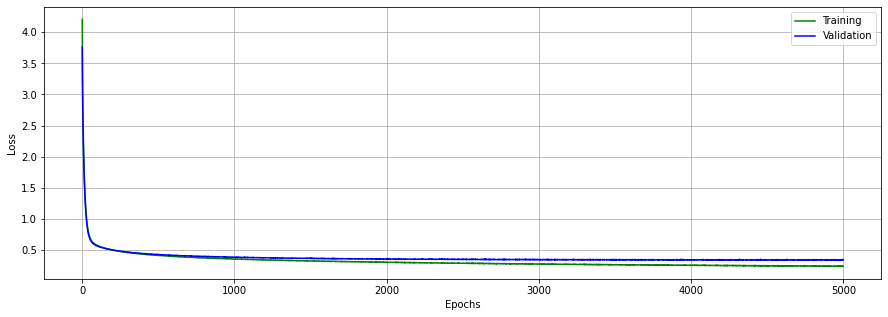

In [128]:
plt.figure(figsize=[15,5])
plt.plot(training_results.history['loss'], 'g')
plt.plot(training_results.history['val_loss'], 'b')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['Training', 'Validation'], loc='upper right');
plt.grid(True)

### 1.7 Plot Accuracy

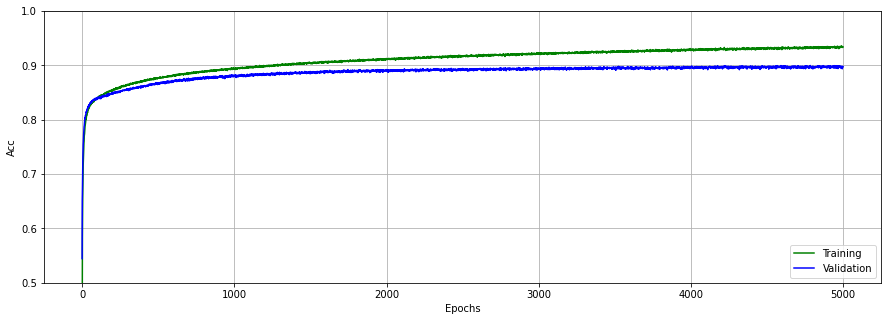

In [129]:
plt.figure(figsize=[15,5])
plt.plot(training_results.history['accuracy'], 'g')
plt.plot(training_results.history['val_accuracy'], 'b')

plt.ylim([0.5, 1])

plt.xlabel('Epochs')
plt.ylabel('Acc')

plt.legend(['Training', 'Validation'], loc='lower right');
plt.grid(True)

## 2. Obtain Model Predictions [10 Points]

Next,  use your trained model to obtain predictions for some sample data. You will recived **10 points** for a correct implementation of the  `cls_predictions` function.

**Note: The `sample_data` argument in the `cls_predictions` function is not a input batch; but rather a single input sample.**

You may find the [model.predict](https://keras.io/api/models/model_training_apis/) , [np.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html), [np.expand_dims](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html) and [np.squeeze](https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html) functions useful.

In [130]:
def cls_predictions(model, sample_data):
    
    '''
    The predictions function should be able to return the correct class label predicted by the model given a 
    sample_data.
    
    Args:
        model: The model which is being trained on the given dataset.
        sample_data: (np.ndarray) sample data on which the model is required to predict on
                      size: (28,28)
        
        Remember that the model accepts the input in a batch
    
    Returns:
        cls_idx: int ---> returns the class index for the sample_data
    '''
    
    cls_idx = None
    
    ###
    # Reshape sample_data to match the input shape expected by the model
    sample_data = sample_data.reshape(1, 28, 28)
    
    # Make predictions using the model
    predictions = model.predict(sample_data)
    
    # Get the predicted class index (index of the maximum probability)
    cls_idx = predictions.argmax(axis=-1)[0]
    ###
    
    return cls_idx
    

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**Now let's visualize some sample data**

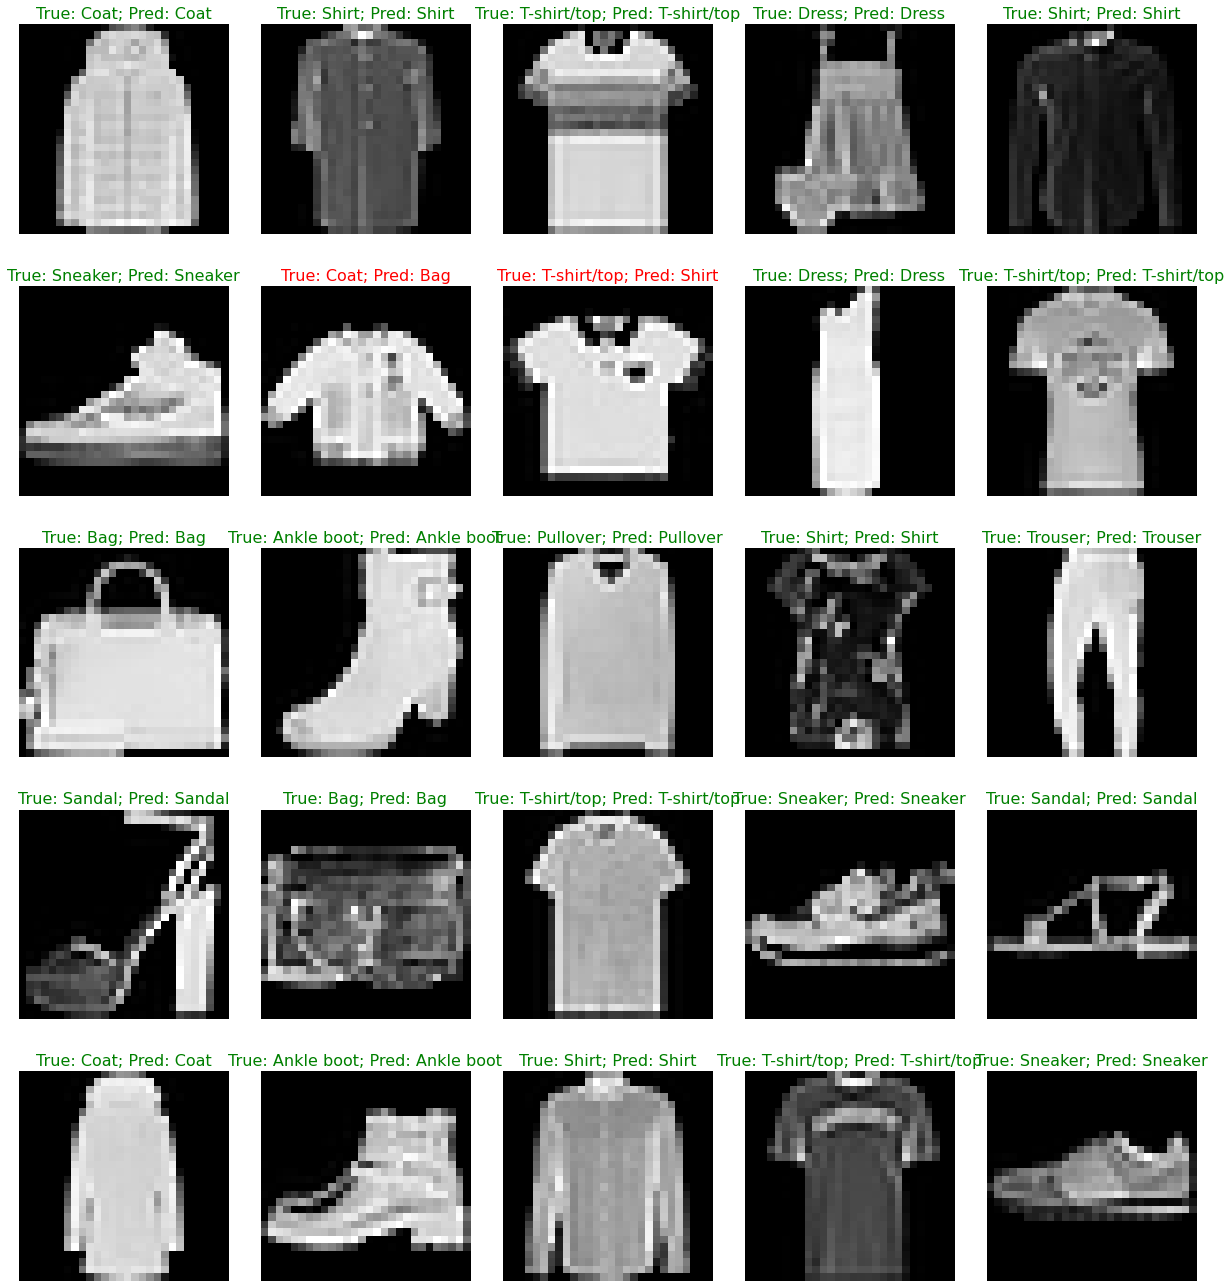

In [131]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 5

num_samples = num_rows * num_cols
sample_index = np.random.randint(0, 10000, num_samples)

X_sample = X_test[sample_index]
gt_sample = y_test[sample_index]

plt.figure(figsize=(24, 18))
for i, sample in enumerate(X_sample):
    plt.subplot(num_rows, num_rows, i+1)
    plt.axis('off')
    plt.imshow(sample, cmap='gray')
    gt_class = class_names[gt_sample[i]]
    pred_class = class_names[cls_predictions(model_final, sample)]
    
    title = 'True: ' + str(gt_class) + '; Pred: ' + str(pred_class)
    title_obj = plt.title(title, fontdict={'fontsize':16})
        
    if gt_class == pred_class:
        plt.setp(title_obj, color='g')
    else:
        plt.setp(title_obj, color='r')
        
    plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.8, wspace=0.0, hspace=0.25)
plt.show()

## 3 Conclusion

In this notebook, we have seen that it is a bit difficult to obtain more than 90% validation accuracy. However, in the next module we will learn about Convolutional Neural Networks (CNNs) and other training techniques which will significantly help improve the validation accuracy beyond 95%!